In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
with open('../tests/59points.txt', 'r') as input_file:
    points = []
    n_points = 0
    for i, line in enumerate(input_file):
        if i == 0:
            n_points = int(line)
            continue
        
        if i <= n_points:
            x, y = line.rstrip().split()
            points.append([float(x), float(y)])
            
points = np.array(points)

In [21]:
hull = \
'''
-2.3634853300000001 -3.9286291900000001
2.8420090600000001 -1.71955408
'''
hull = np.array([list(map(float, i.split())) for i in hull.split('\n')][1:-1])

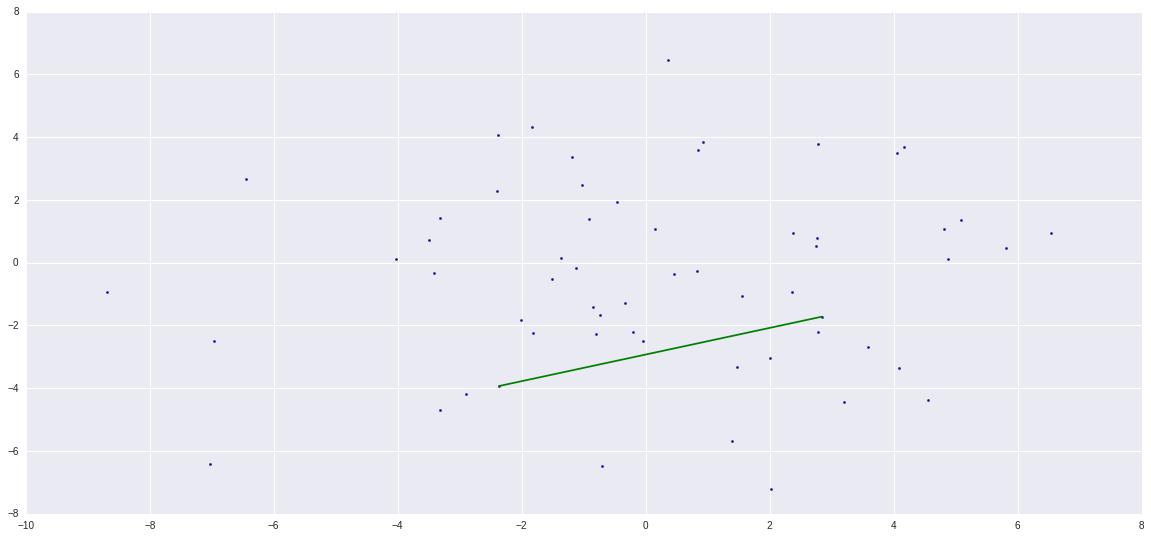

In [22]:
plt.figure(figsize=(20, 9))
plt.scatter(points[:, 0], points[:, 1], marker='.')
plt.plot(hull[:, 0], hull[:, 1], c='green')
# plt.xlim([106.99, 107.01])
# plt.ylim([60, 70])

In [225]:
points[-1] / norm(points[-1]), points[-2] / norm(points[-2])

(array([ 0.65617871,  0.75460552]), array([ 0.5547002 ,  0.83205029]))

In [46]:
p1 = points[0, :]
p2 = points[int(len(points) / 3), :]
p3 = points[int(2 *len(points) / 3), :]
p4 = points[-1, :]
p5 = 0.2 * (p1 + p2 + p3 + p4)

In [211]:
p1 = np.random.normal(size=(2,))
p2 = np.random.normal(size=(2,))
p3 = np.random.normal(size=(2,))
p4 = np.random.normal(size=(2,))
p5 = np.random.normal(size=(2,))

In [212]:
p2[1] = min(p1[1], p2[1], p3[1], p4[1], p5[1]) - 0.5

In [213]:
m = np.array([min((p1 - p2)[0], (p2 - p2)[0], (p3 - p2)[0], (p4 - p2)[0], (p5 - p2)[0]), 0])

In [214]:
p1, p2, p3, p4, p5 = p1 - m, p2 - m, p3 - m, p4 - m, p5 - m 

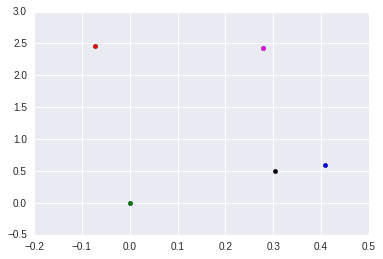

In [216]:
plt.scatter((p1-p2)[0], (p1-p2)[1], c='blue')
plt.scatter((p2-p2)[0], (p2-p2)[1], c='green')
plt.scatter((p3-p2)[0], (p3-p2)[1], c='red')
plt.scatter((p4-p2)[0], (p4-p2)[1], c='magenta')
plt.scatter((p5-p2)[0], (p5-p2)[1], c='black')
# plt.scatter(pivot[0], pivot[1], c='cyan')
# plt.scatter((pivot)[0], (pivot)[1], c='orange')

# plt.scatter((p1)[0], (p1)[1], c='blue')
# plt.scatter((p2)[0], (p2)[1], c='green')
# plt.scatter((p3)[0], (p3)[1], c='red')
# plt.scatter((p4)[0], (p4)[1], c='magenta')
# plt.scatter((p5)[0], (p5)[1], c='black')


In [202]:
def cross_product(p, q):
    return p[0] * q[1] - p[1] * q[0]

def norm(p):
    return np.sqrt(p[0] ** 2 + p[1] **2)

In [203]:
def cos(p, q):
    return np.dot(p, q) / (norm(p) * norm(q))

In [152]:
norm(p5 - p2), norm(p1 - p2)

(array([-0.50180059,  0.86498333]), array([ 0.19586791,  0.98063029]))

In [199]:
(np.arccos(cross_product( norm(pivot), norm(p4 - p2))), 
 np.arccos(cross_product(norm(pivot), norm(p3 - p2))), 
 np.arccos(cross_product( norm(pivot), norm(p1 - p2))), 
 np.arccos(cross_product( norm(pivot), norm(p5 - p2))))

(1.1779838627462922,
 1.1563529123547682,
 0.82396558889942451,
 1.1332625703921002)

In [330]:
cross_product(hull[1] - hull[0], hull[2] - hull[1])

-12

In [316]:
hull[0, 1] *= 4
hull[2, 1] *= 4

In [374]:
slope = (hull[-1, 1] - hull[0, 1]) / (hull[-1, 0] - hull[0, 0])
intercept = - hull[0, 0] * slope + hull[0, 1]

In [376]:
120 - (slope * 60 + intercept)

58.796610169491522

In [8]:
Ns = np.logspace(1, 5.2, 50).astype(int)

In [10]:
for N in Ns:
    points = np.random.multivariate_normal([0, 0], [[9, 0],[0, 9]], size=N)
    np.savetxt('../tests/%dpoints.txt' % N, points, fmt='%.8e', header='%d' % N, comments='')

In [23]:
import re
import os
import subprocess

pattern = re.compile(r'^>>> Elapsed time: (?P<elapsed_time>.+)$')
elapsed_times = []

for N in Ns:
    os.system('./Lab2 -i ../tests/%dpoints.txt > tmp.txt' % N)
    with open('tmp.txt', 'r') as tmp_file:
        s = tmp_file.read().split('\n')
        
        elapsed_time = pattern.match(s[-2]).group('elapsed_time')
        elapsed_time = float(elapsed_time)
        elapsed_times.append(elapsed_time)

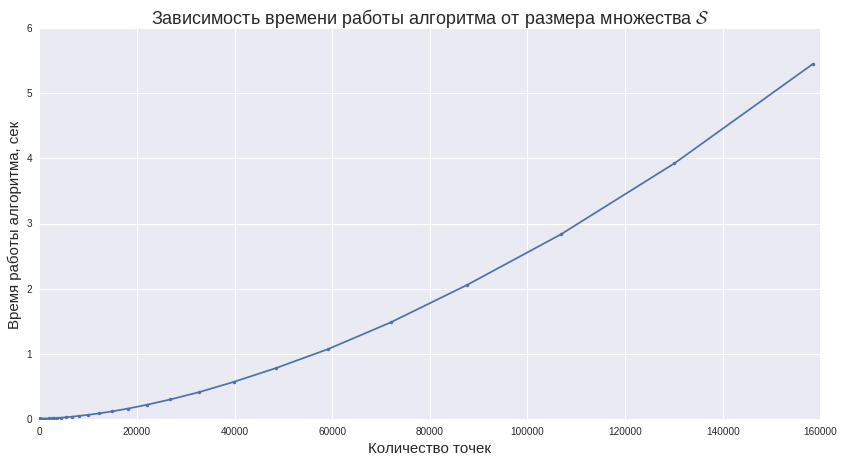

In [47]:
sns.set_style('darkgrid')

plt.figure(figsize=(14, 7))
plt.plot(Ns, elapsed_times, marker='.')

plt.title('Зависимость времени работы алгоритма от размера множества $\mathcal{S}$', fontsize=18)
plt.xlabel('Количество точек', fontsize=15)
plt.ylabel('Время работы алгоритма, сек', fontsize=15)

plt.savefig('../expriments.png')

In [48]:
Ns

array([    10,     12,     14,     18,     22,     26,     32,     39,
           48,     59,     71,     87,    106,    130,    158,    193,
          235,    286,    349,    425,    517,    630,    768,    936,
         1140,   1389,   1692,   2061,   2511,   3059,   3727,   4540,
         5531,   6738,   8208,  10000,  12181,  14839,  18077,  22022,
        26826,  32680,  39810,  48496,  59078,  71968,  87671, 106800,
       130102, 158489])